In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

Importing the data

In [196]:
raw_data = pd.read_csv('bank_transactions_data_2.csv')
raw_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Checking Missing values in the data

In [197]:
raw_data.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [198]:
data = raw_data.copy()
print(data.describe(include='all'))
data = data.drop(['MerchantID','IP Address','DeviceID'],axis=1)

       TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2512      2512        2512.000000                 2512   
unique          2512       495                NaN                 2512   
top         TX002512   AC00363                NaN  2023-02-14 16:21:23   
freq               1        12                NaN                    1   
mean             NaN       NaN         297.593778                  NaN   
std              NaN       NaN         291.946243                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.885000                  NaN   
50%              NaN       NaN         211.140000                  NaN   
75%              NaN       NaN         414.527500                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2512        2512   

In [199]:
data.isna().sum() #checking for NaN Values

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0


Feature Engineering:- finding transaction frequency by grouping account id and counting .
Time Features : Transaction in month,day.hour
Velocity Features - time difference between transactions  

In [200]:

# 1. Transaction Frequency
transaction_frequency = data.groupby('AccountID')['TransactionID'].count().reset_index()
transaction_frequency.columns = ['AccountID', 'TransactionFrequency']
data = data.merge(transaction_frequency, on='AccountID', how='left')

# 2. Time Features
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['TransactionHour'] = data['TransactionDate'].dt.hour
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionMonth'] = data['TransactionDate'].dt.month

# 3. Velocity Features
data = data.sort_values(by=['AccountID', 'TransactionDate'])
data['TransactionTimeDiff'] = data.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()
data['TransactionTimeDiff'] = data['TransactionTimeDiff'].fillna(0)

data.head()




,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionFrequency,TransactionHour,TransactionDay,TransactionMonth,TransactionTimeDiff
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,Branch,25,Student,37,1,1649.92,2024-11-04 08:11:55,2,17,15,9,0.0
2016,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,Online,59,Engineer,178,1,4180.40,2024-11-04 08:10:42,2,16,14,11,5183774.0
2120,TX002121,AC00002,476.99,2023-01-10 16:00:32,Debit,San Diego,Online,23,Student,187,1,1154.48,2024-11-04 08:10:10,7,16,10,1,0.0
20,TX000021,AC00002,59.32,2023-02-28 16:36:58,Debit,Los Angeles,Branch,71,Retired,38,1,5750.89,2024-11-04 08:09:24,7,16,28,2,4235786.0
1476,TX001477,AC00002,12.62,2023-05-05 16:35:44,Debit,El Paso,Branch,33,Doctor,61,1,6420.47,2024-11-04 08:09:03,7,16,5,5,5702326.0


In [201]:
#columns for one-hot encoding
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [202]:
data_encoded.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionFrequency,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,25,37,1,1649.92,2024-11-04 08:11:55,2,...,False,False,False,False,False,True,False,False,False,True
2016,TX002017,AC00001,212.97,2023-11-14 16:56:34,59,178,1,4180.40,2024-11-04 08:10:42,2,...,False,False,False,False,False,False,True,True,False,False
2120,TX002121,AC00002,476.99,2023-01-10 16:00:32,23,187,1,1154.48,2024-11-04 08:10:10,7,...,False,False,False,False,False,False,True,False,False,True
20,TX000021,AC00002,59.32,2023-02-28 16:36:58,71,38,1,5750.89,2024-11-04 08:09:24,7,...,False,False,False,False,False,True,False,False,True,False
1476,TX001477,AC00002,12.62,2023-05-05 16:35:44,33,61,1,6420.47,2024-11-04 08:09:03,7,...,False,False,False,False,False,True,False,False,False,False


In [203]:
#numerical columns
num_cols = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge','TransactionFrequency', 'TransactionHour',
            'TransactionDay', 'TransactionMonth', 'TransactionTimeDiff']
scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])


In [204]:
data_encoded.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionFrequency,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
1312,TX001313,AC00001,-0.855820,2023-09-15 17:00:20,-1.105984,-1.181466,1,-0.888266,2024-11-04 08:11:55,-1.823553,...,False,False,False,False,False,True,False,False,False,True
2016,TX002017,AC00001,-0.289919,2023-11-14 16:56:34,0.805347,0.834265,1,-0.239452,2024-11-04 08:10:42,-1.823553,...,False,False,False,False,False,False,True,True,False,False
2120,TX002121,AC00002,0.614606,2023-01-10 16:00:32,-1.218415,0.962929,1,-1.015296,2024-11-04 08:10:10,0.394950,...,False,False,False,False,False,False,True,False,False,True
20,TX000021,AC00002,-0.816319,2023-02-28 16:36:58,1.479934,-1.167170,1,0.163220,2024-11-04 08:09:24,0.394950,...,False,False,False,False,False,True,False,False,True,False
1476,TX001477,AC00002,-0.976312,2023-05-05 16:35:44,-0.656259,-0.838362,1,0.334900,2024-11-04 08:09:03,0.394950,...,False,False,False,False,False,True,False,False,False,False


In [205]:
data_encoded.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate', 'TransactionFrequency', 'TransactionHour',
       'TransactionDay', 'TransactionMonth', 'TransactionTimeDiff',
       'TransactionType_Debit', 'Location_Atlanta', 'Location_Austin',
       'Location_Baltimore', 'Location_Boston', 'Location_Charlotte',
       'Location_Chicago', 'Location_Colorado Springs', 'Location_Columbus',
       'Location_Dallas', 'Location_Denver', 'Location_Detroit',
       'Location_El Paso', 'Location_Fort Worth', 'Location_Fresno',
       'Location_Houston', 'Location_Indianapolis', 'Location_Jacksonville',
       'Location_Kansas City', 'Location_Las Vegas', 'Location_Los Angeles',
       'Location_Louisville', 'Location_Memphis', 'Location_Mesa',
       'Location_Miami', 'Location_Milwaukee', 'Location_Nashville',
       'Location_New York', 'Location_Oklahoma City', 'L

In [206]:
data_preprocessed = data_encoded.drop(['TransactionID','AccountID','TransactionDate','PreviousTransactionDate'],axis=1)

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test =  train_test_split(data_preprocessed,test_size=0.2,random_state=35)
X_train.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionFrequency,TransactionHour,TransactionDay,TransactionMonth,TransactionTimeDiff,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
1039,0.952510,-0.094103,0.133763,1,-1.251201,0.838651,1.879574,-0.436921,-0.161875,-0.854098,...,False,False,False,False,False,False,True,False,False,False
2500,0.095948,1.367503,-0.452372,1,2.221135,-1.379852,-0.856729,1.161335,0.701459,1.271164,...,False,False,False,False,False,False,False,False,False,False
1863,-0.665028,-0.712475,-1.238649,1,0.353818,-0.492451,-0.856729,1.617979,-1.600766,-0.855203,...,False,False,False,False,False,False,False,True,False,False
1025,-0.672360,-1.162199,-1.052802,1,-1.130989,-1.823553,0.511423,-1.464371,-1.025210,-0.855203,...,False,False,False,False,False,False,False,False,False,True
1151,0.483049,-0.431397,-0.237932,1,0.994852,-0.936152,0.511423,1.617979,0.989238,0.783830,...,True,False,False,False,False,False,True,True,False,False


In [208]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=200,contamination=0.005, max_samples='auto',
    max_features=1.0,random_state=35)
model.fit(X_test)
predictions = model.predict(X_test)

In [209]:
num_anomalies = sum(predictions == -1)
total = len(predictions)
print(f"Number of anomalies: {num_anomalies}")
print(f"Anomaly proportion: {num_anomalies / total:.2%}")

X_test_anomalies = X_test.copy()
X_test_anomalies["Anomaly"] = predictions

anomalous_data = X_test_anomalies[X_test_anomalies["Anomaly"] == -1]

print("Anomalous Transactions:")
print(anomalous_data.head())


Number of anomalies: 3
Anomaly proportion: 0.60%
Anomalous Transactions:
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
1281           3.768554    -1.049768             0.348202              1   
394           -0.997964     1.985874             2.335341              5   
625            1.795024     1.929659            -1.195761              1   

      AccountBalance  TransactionFrequency  TransactionHour  TransactionDay  \
1281       -1.020345              0.394950         0.511423       -0.322760   
394         0.662376             -0.492451         1.879574       -0.208599   
625        -0.275369              0.394950         1.879574        0.704690   

      TransactionMonth  TransactionTimeDiff  ...  Location_Seattle  \
1281          1.277016             3.086006  ...             False   
394           1.564794            -0.521524  ...             False   
625           0.413681             2.579040  ...             False   

      Location_Tucson  L

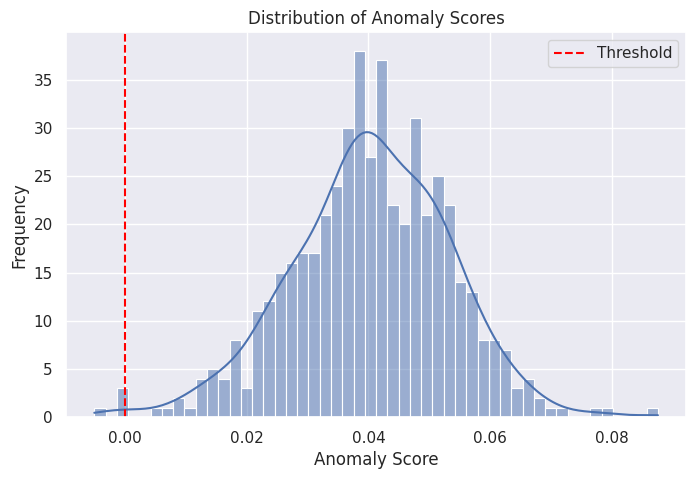

In [210]:
scores = model.decision_function(X_test)
plt.figure(figsize=(8, 5))
sns.histplot(scores, bins=50, kde=True)
plt.axvline(x=0, color='red', linestyle='dashed', label="Threshold")
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


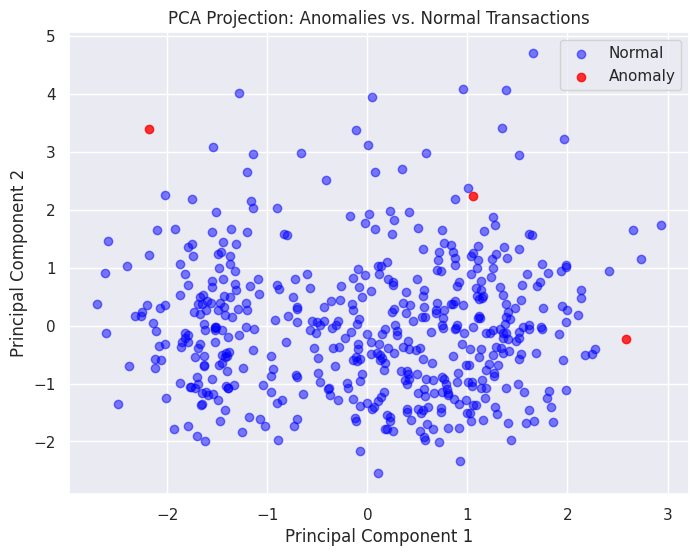

In [211]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[predictions == 1, 0], X_pca[predictions == 1, 1], c='blue', label='Normal', alpha=0.5)
plt.scatter(X_pca[predictions == -1, 0], X_pca[predictions == -1, 1], c='red', label='Anomaly', alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("PCA Projection: Anomalies vs. Normal Transactions")
plt.show()
